In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
df_dados = pd.read_csv('Downloads/sf-crime/train/train.csv',delimiter=',')
df_dados = df_dados.sample(frac=1)
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_dados['DayOfWeek'] = pd.Categorical(df_dados['DayOfWeek'], ordered=True, categories=dow)
df_dados

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
783682,2004-04-04 14:15:00,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Sunday,NORTHERN,"ARREST, BOOKED",1100 Block of SUTTER ST,-122.419317,37.787914
261522,2011-11-01 09:15:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Tuesday,NORTHERN,NONE,2100 Block of CHESTNUT ST,-122.438701,37.800450
785017,2004-04-01 14:30:00,RUNAWAY,RUNAWAY,Thursday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727
351771,2010-06-29 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524
690049,2005-07-30 23:30:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,11TH ST / FOLSOM ST,-122.414027,37.771864
...,...,...,...,...,...,...,...,...,...
352003,2010-06-28 11:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Monday,INGLESIDE,NONE,400 Block of YERBABUENA AV,-122.458573,37.731664
711585,2005-04-10 21:50:00,VEHICLE THEFT,RECOVERED VEHICLE - STOLEN OUTSIDE SF,Sunday,NORTHERN,NONE,800 Block of ELLIS ST,-122.420213,37.783979
418906,2009-06-24 16:50:00,SECONDARY CODES,DOMESTIC VIOLENCE,Wednesday,INGLESIDE,NONE,700 Block of SILVER AV,-122.420017,37.729042
527157,2007-12-01 12:05:00,DISORDERLY CONDUCT,DISTURBING THE PEACE,Saturday,CENTRAL,"ARREST, BOOKED",200 Block of GEARY ST,-122.407435,37.787516


In [3]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878049 entries, 783682 to 191702
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Dates       878049 non-null  object  
 1   Category    878049 non-null  object  
 2   Descript    878049 non-null  object  
 3   DayOfWeek   878049 non-null  category
 4   PdDistrict  878049 non-null  object  
 5   Resolution  878049 non-null  object  
 6   Address     878049 non-null  object  
 7   X           878049 non-null  float64 
 8   Y           878049 non-null  float64 
dtypes: category(1), float64(2), object(6)
memory usage: 61.1+ MB


In [4]:
df_dados.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [5]:
df_dados['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [6]:
target = df_dados['Category'].array
target


<PandasArray>
[     'DRUG/NARCOTIC',      'LARCENY/THEFT',            'RUNAWAY',
              'FRAUD',       'NON-CRIMINAL',      'LARCENY/THEFT',
     'OTHER OFFENSES',       'PROSTITUTION',      'LARCENY/THEFT',
      'LARCENY/THEFT',
 ...
           'BURGLARY',            'ASSAULT',     'OTHER OFFENSES',
           'BURGLARY',      'DRUG/NARCOTIC',          'VANDALISM',
      'VEHICLE THEFT',    'SECONDARY CODES', 'DISORDERLY CONDUCT',
           'BURGLARY']
Length: 878049, dtype: object

In [7]:
df_features = df_dados.drop(columns=['Category','Descript'])

df_features

,Dates,DayOfWeek,PdDistrict,Resolution,Address,X,Y
783682,2004-04-04 14:15:00,Sunday,NORTHERN,"ARREST, BOOKED",1100 Block of SUTTER ST,-122.419317,37.787914
261522,2011-11-01 09:15:00,Tuesday,NORTHERN,NONE,2100 Block of CHESTNUT ST,-122.438701,37.800450
785017,2004-04-01 14:30:00,Thursday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727
351771,2010-06-29 00:01:00,Tuesday,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524
690049,2005-07-30 23:30:00,Saturday,SOUTHERN,NONE,11TH ST / FOLSOM ST,-122.414027,37.771864
...,...,...,...,...,...,...,...
352003,2010-06-28 11:00:00,Monday,INGLESIDE,NONE,400 Block of YERBABUENA AV,-122.458573,37.731664
711585,2005-04-10 21:50:00,Sunday,NORTHERN,NONE,800 Block of ELLIS ST,-122.420213,37.783979
418906,2009-06-24 16:50:00,Wednesday,INGLESIDE,NONE,700 Block of SILVER AV,-122.420017,37.729042
527157,2007-12-01 12:05:00,Saturday,CENTRAL,"ARREST, BOOKED",200 Block of GEARY ST,-122.407435,37.787516


<AxesSubplot: >

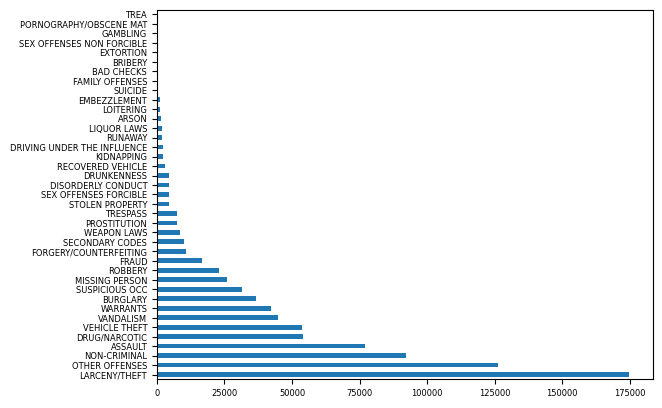

In [8]:
df_dados['Category'].value_counts().plot(kind="barh", fontsize=6)

<AxesSubplot: ylabel='Category'>

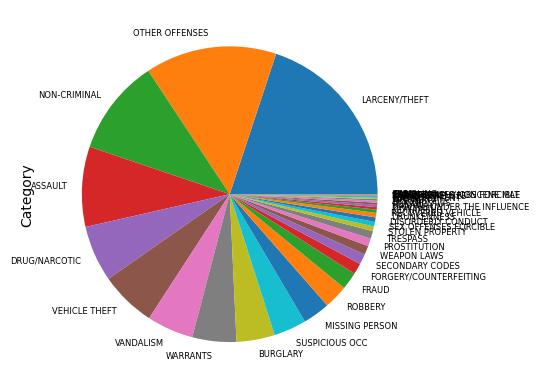

In [9]:
df_dados['Category'].value_counts().plot(kind="pie", fontsize=6)

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

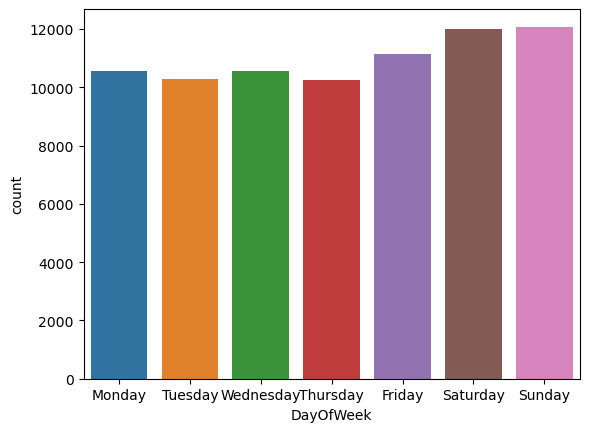

In [10]:
df2 = df_dados.loc[(df_dados['Category']=='ASSAULT'), :]

sns.countplot(data=df2, x="DayOfWeek")

In [11]:
df_dados['Dates'] = pd.to_datetime(df_dados['Dates'])

df_dados['Year'] = df_dados['Dates'].dt.year
df_dados['Month'] = df_dados['Dates'].dt.month
df_dados['DayOfMonth'] = df_dados['Dates'].dt.day
df_dados['Hours'] = df_dados['Dates'].dt.hour
df_dados['Minutes'] = df_dados['Dates'].dt.minute
#df_dados['Seconds'] = df_dados['Dates'].dt.second

#df_dados = df_dados.apply(break_date, axis=1)

df_dados.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,DayOfMonth,Hours,Minutes
783682,2004-04-04 14:15:00,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Sunday,NORTHERN,"ARREST, BOOKED",1100 Block of SUTTER ST,-122.419317,37.787914,2004,4,4,14,15
261522,2011-11-01 09:15:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Tuesday,NORTHERN,NONE,2100 Block of CHESTNUT ST,-122.438701,37.800450,2011,11,1,9,15
785017,2004-04-01 14:30:00,RUNAWAY,RUNAWAY,Thursday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727,2004,4,1,14,30
351771,2010-06-29 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524,2010,6,29,0,1
690049,2005-07-30 23:30:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,11TH ST / FOLSOM ST,-122.414027,37.771864,2005,7,30,23,30


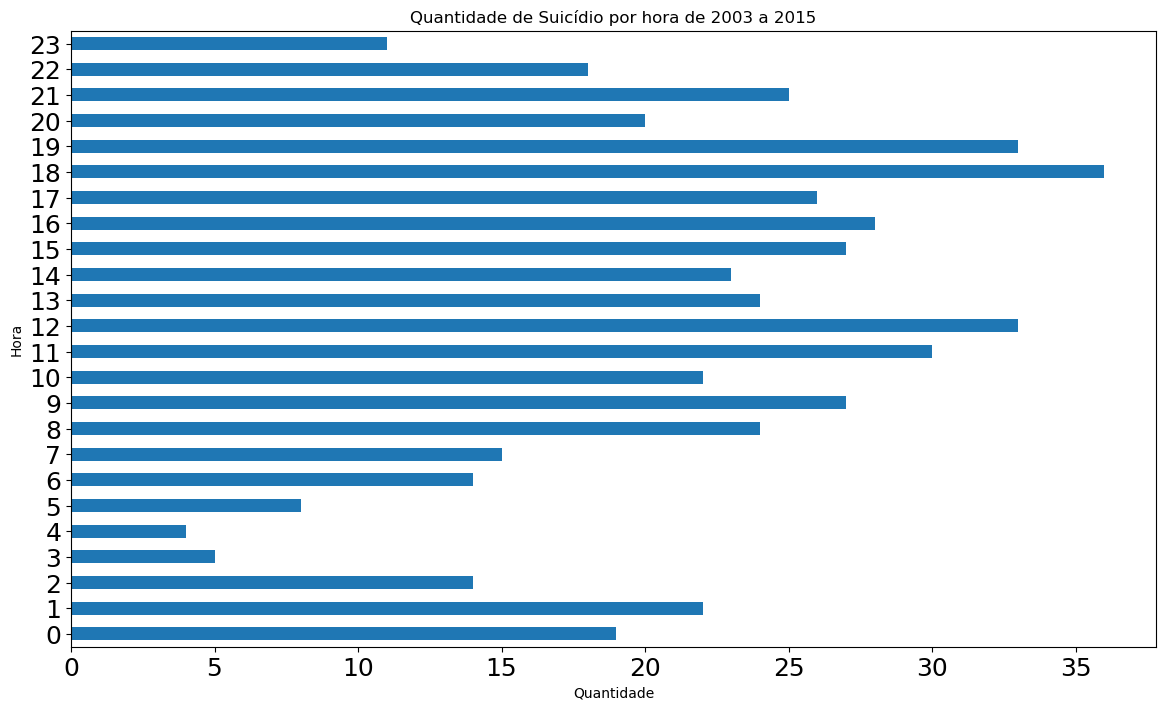

In [12]:
df2 = df_dados.loc[(df_dados['Category']=='SUICIDE'), :]
df2['Hours'].value_counts().sort_index().plot(kind="barh",  figsize=(14, 8), fontsize=18, title="Quantidade de Suicídio por hora de 2003 a 2015")
plt.xlabel("Quantidade")
plt.ylabel("Hora")
#sns.countplot(data=df2, y="Hours")
plt.show()

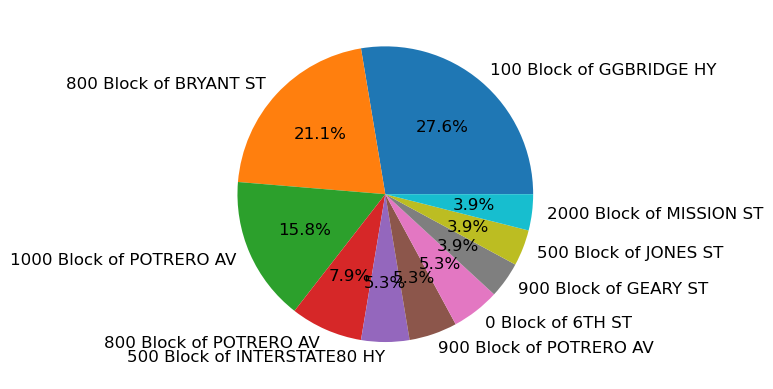

In [13]:
df2 = df_dados.loc[(df_dados['Category']=='SUICIDE'), :]

df2['Address'].value_counts()[:10].plot(kind="pie", fontsize=12,autopct='%1.1f%%')
plt.ylabel("")
plt.show()

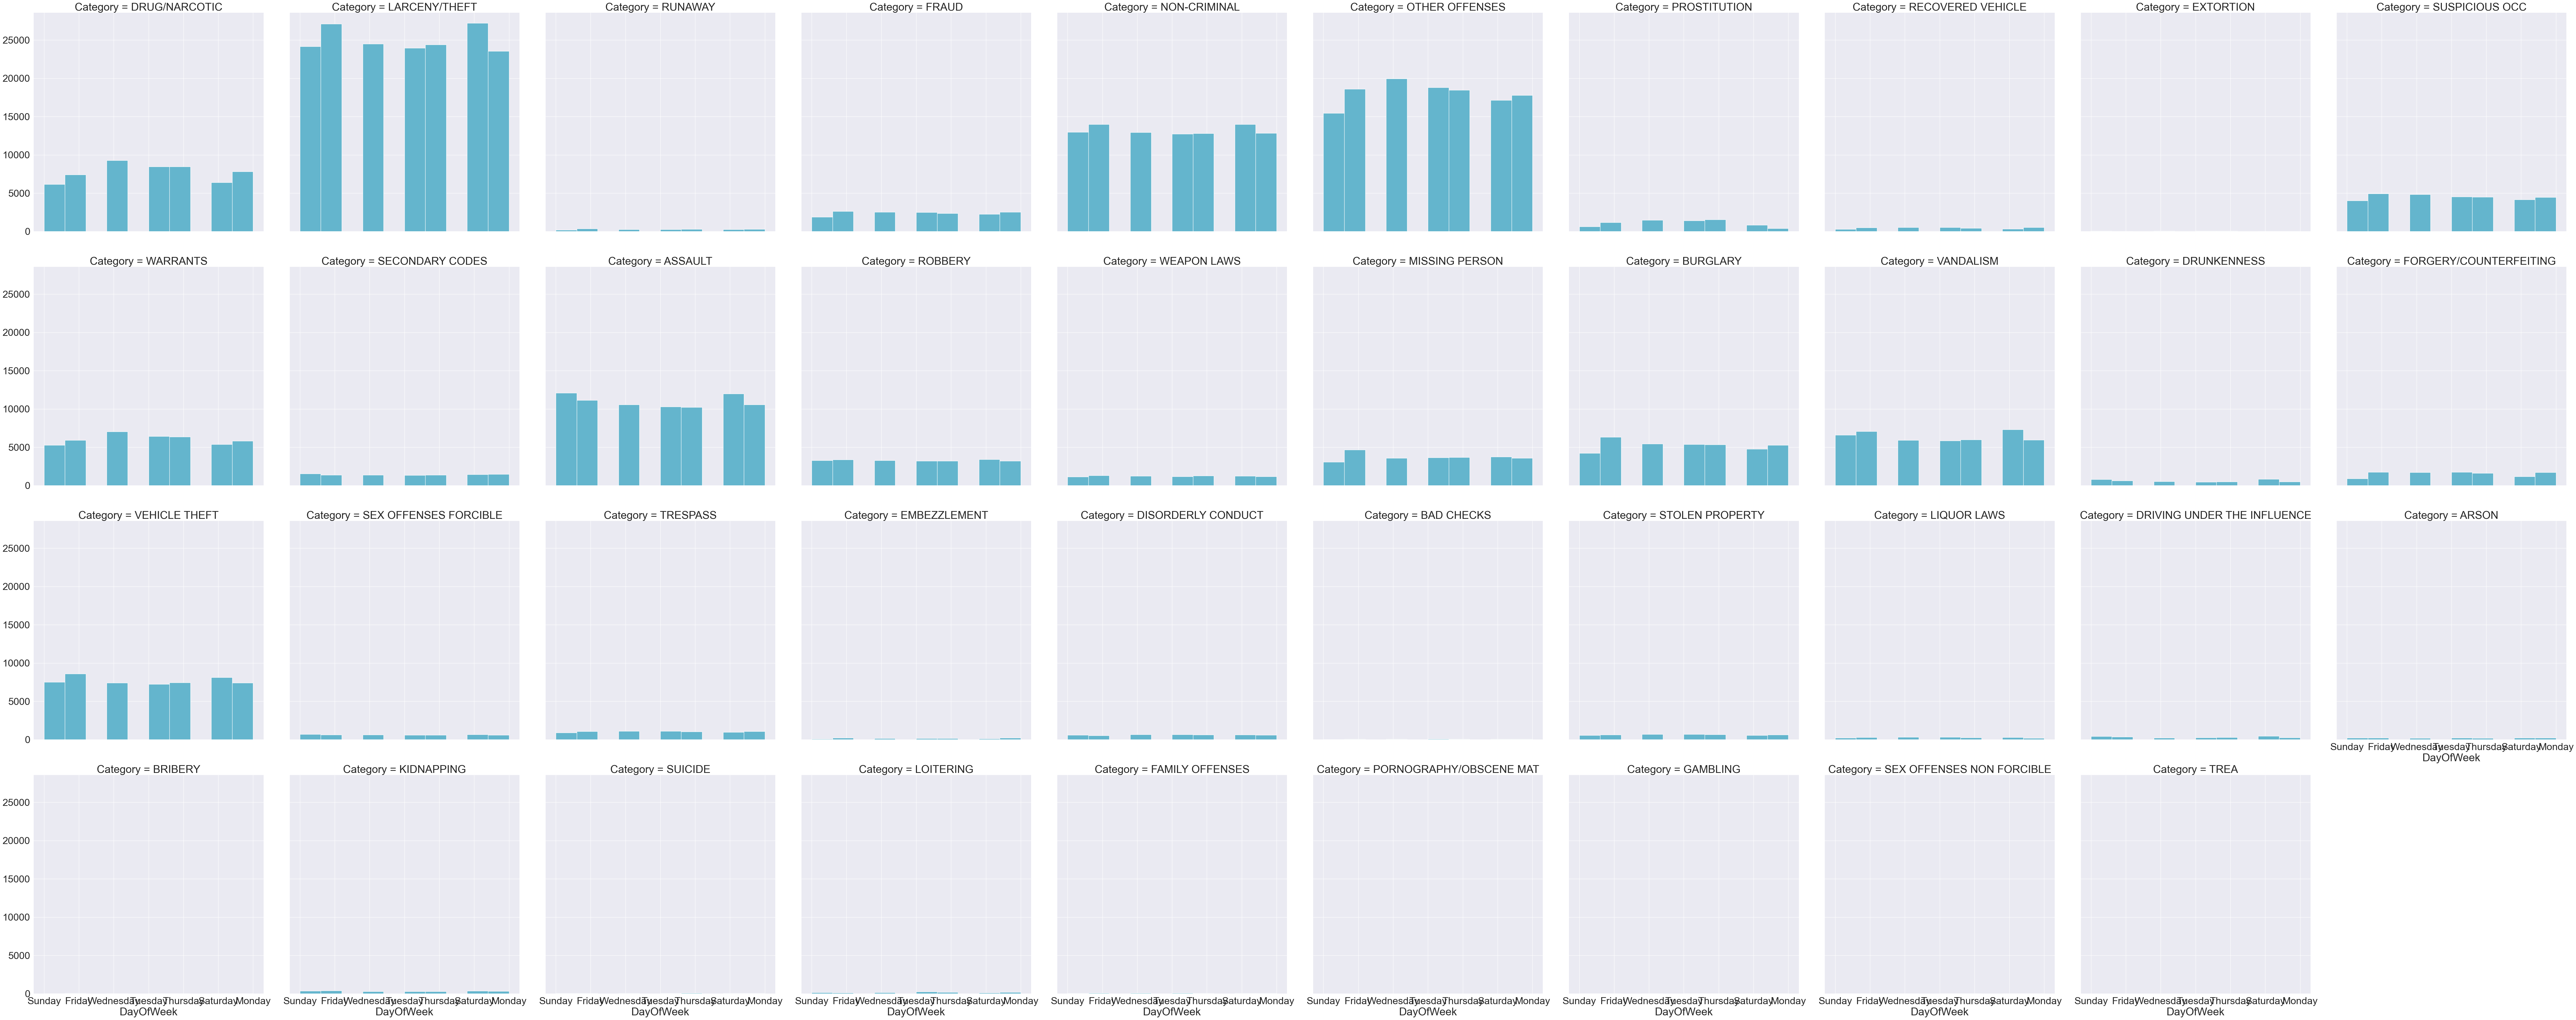

In [14]:
sns.set(font_scale=2.5)
g = sns.FacetGrid(df_dados, col="Category", col_wrap=10, height=10)
g = g.map(plt.hist, "DayOfWeek", color="c")

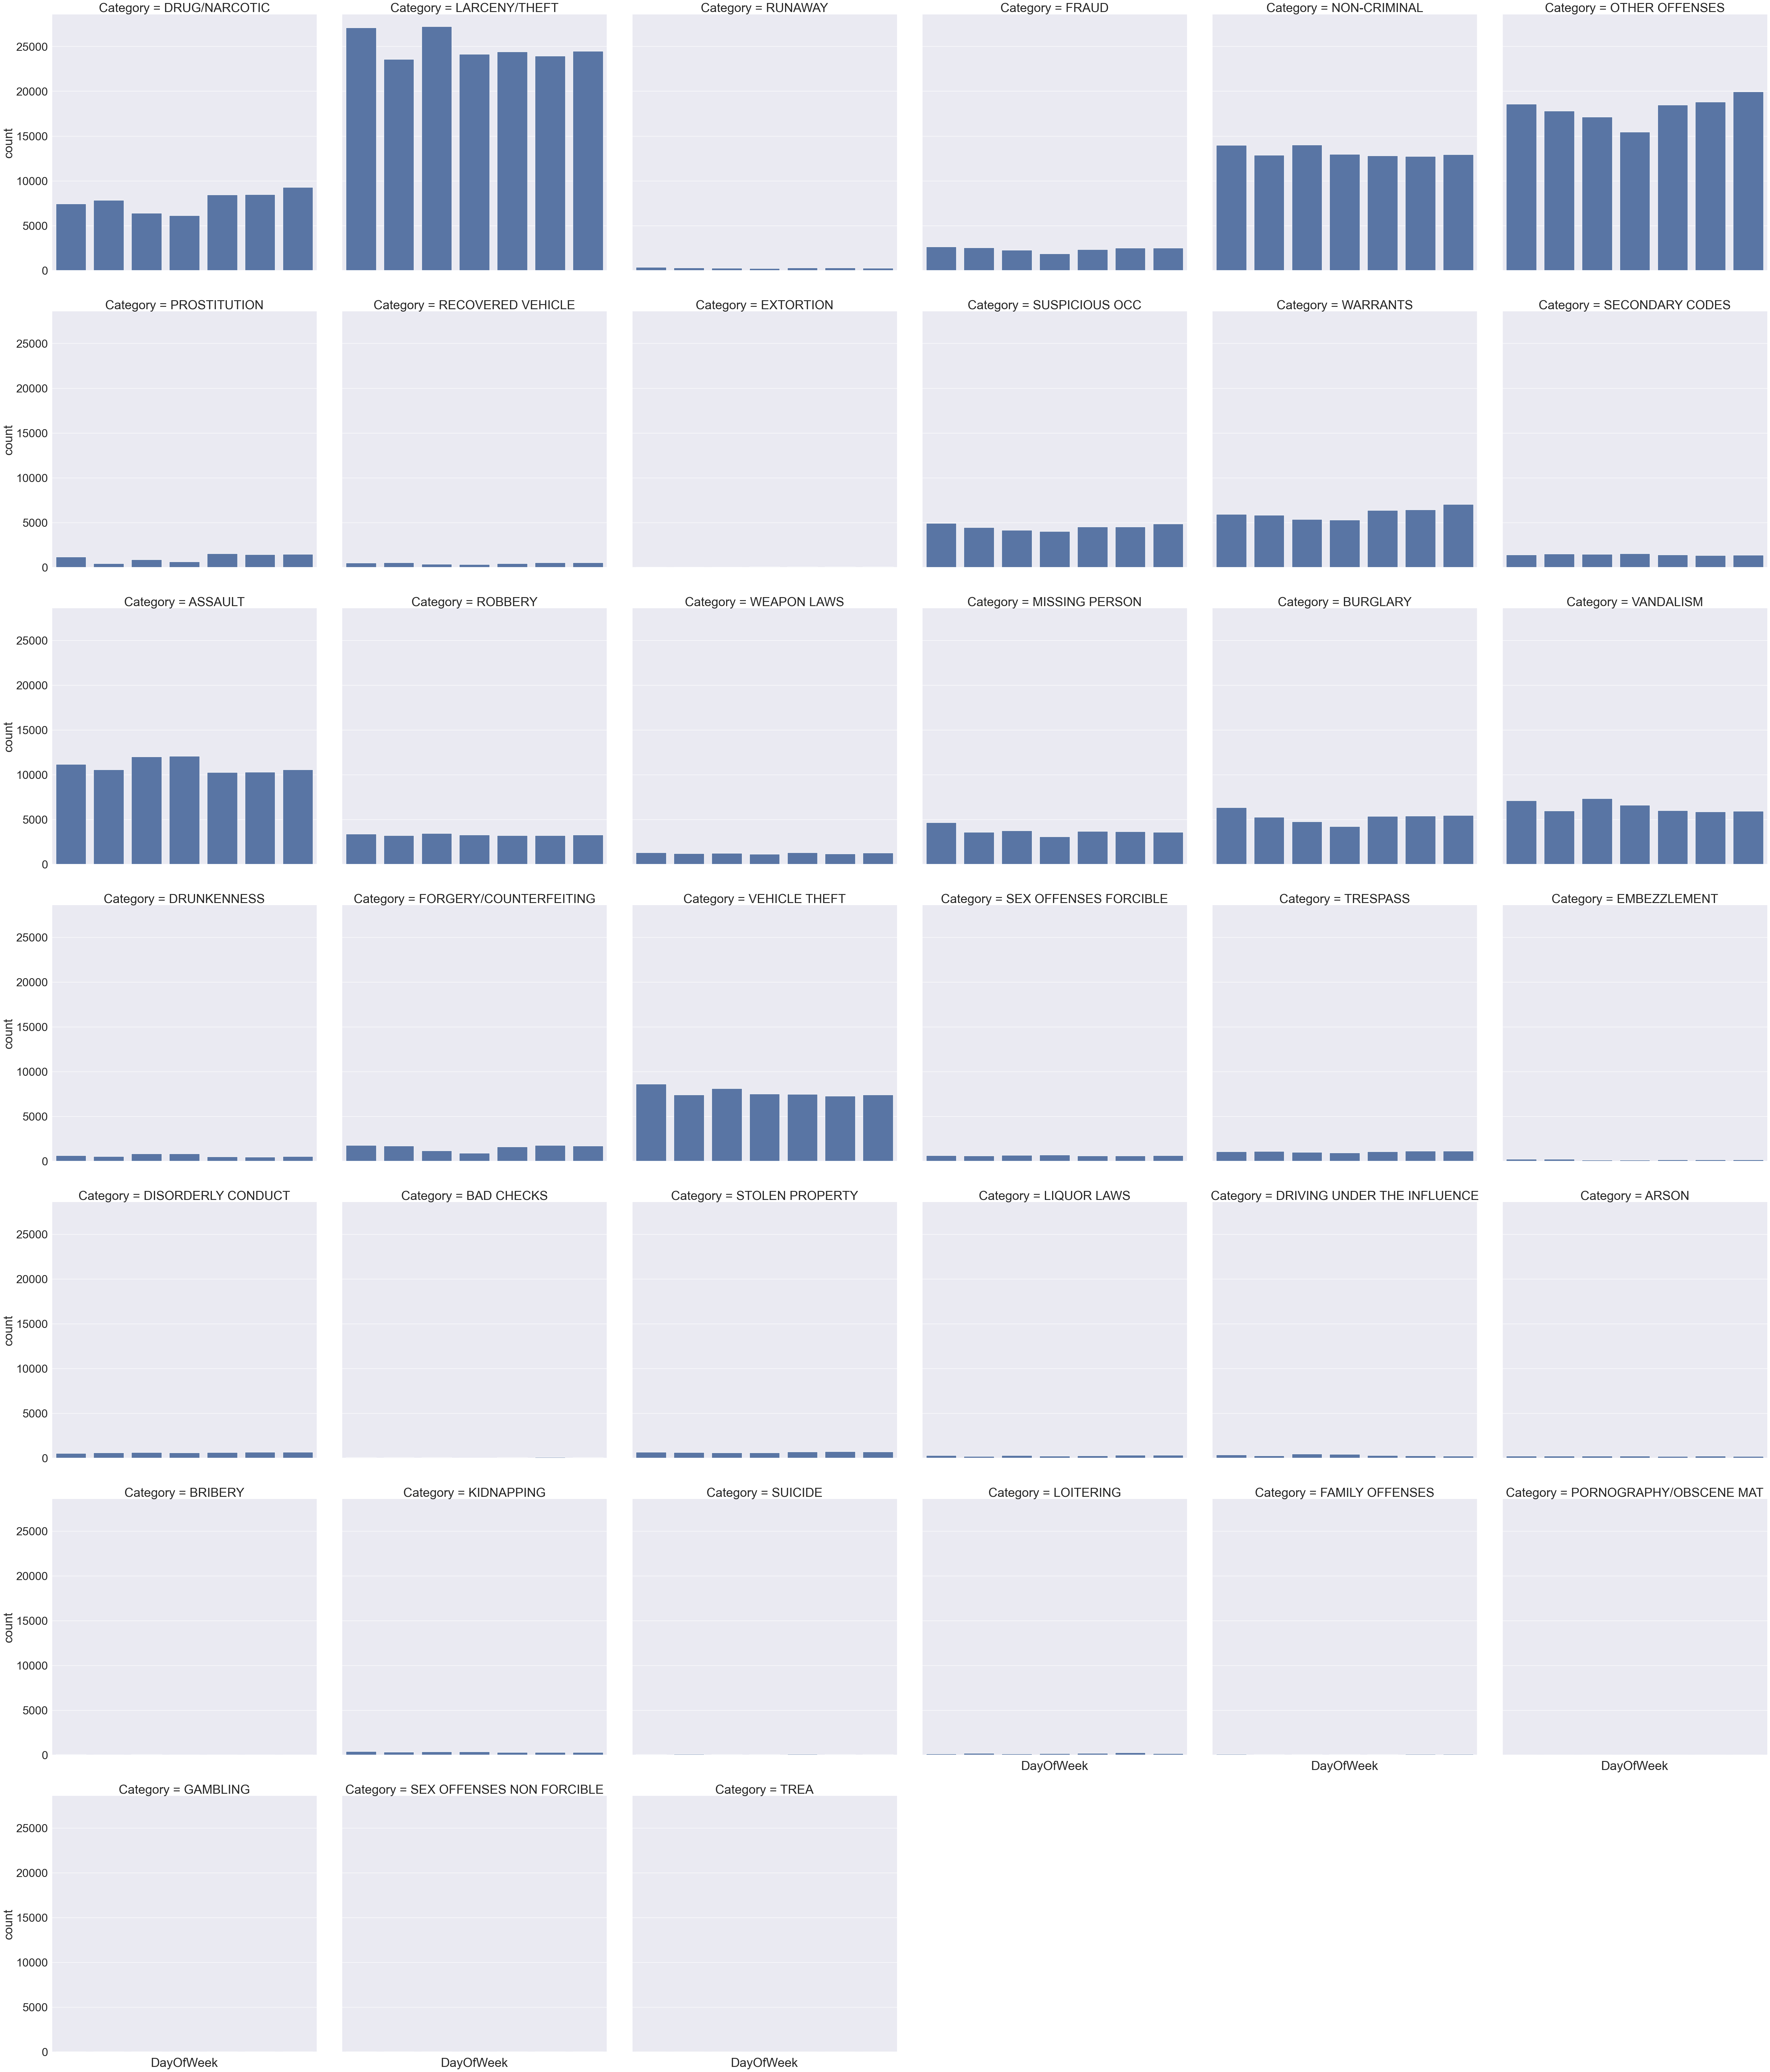

In [15]:
g = sns.FacetGrid(df_dados, col="Category", col_wrap=6, height=10)
g = g.map(sns.countplot, "DayOfWeek", order=np.sort(df_dados['DayOfWeek'].unique()))
g.set_xticklabels(rotation=30)
g.savefig('test.png')

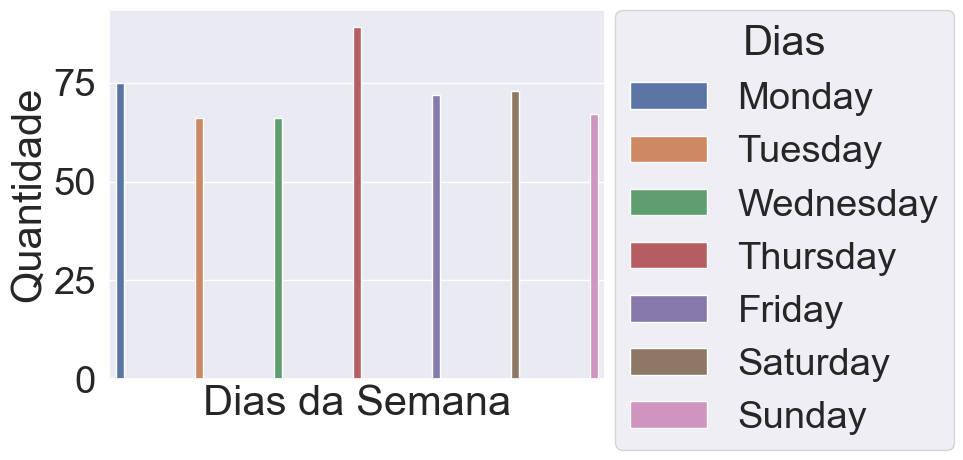

In [16]:
df2 = df_dados.loc[(df_dados['Category']=='SUICIDE'), :]

sns.countplot(data=df2, x="DayOfWeek",hue='DayOfWeek')
plt.xlabel("Dias da Semana")
plt.ylabel("Quantidade")
plt.xticks([])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Dias')

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

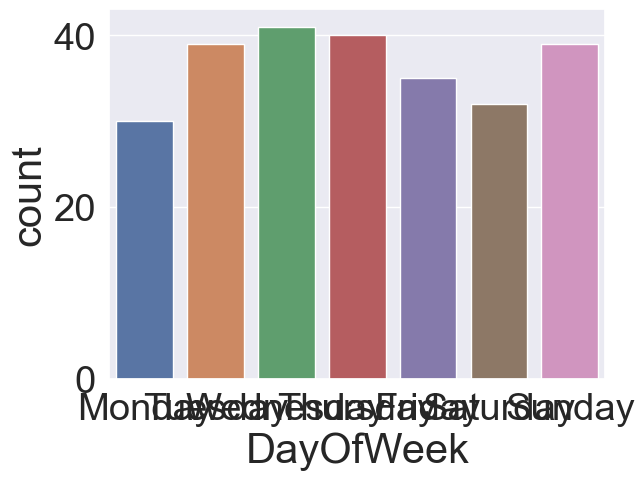

In [17]:
df2 = df_dados.loc[(df_dados['Category']=='EXTORTION'), :]

sns.countplot(data=df2, x="DayOfWeek")


In [18]:
df_dados['Dates'] = pd.to_datetime(df_dados['Dates'])

df_dados['Year'] = df_dados['Dates'].dt.year
df_dados['Month'] = df_dados['Dates'].dt.month
df_dados['DayOfMonth'] = df_dados['Dates'].dt.day
df_dados['Hours'] = df_dados['Dates'].dt.hour
df_dados['Minutes'] = df_dados['Dates'].dt.minute
#df_dados['Seconds'] = df_dados['Dates'].dt.second

#df_dados = df_dados.apply(break_date, axis=1)

df_dados.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,DayOfMonth,Hours,Minutes
783682,2004-04-04 14:15:00,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Sunday,NORTHERN,"ARREST, BOOKED",1100 Block of SUTTER ST,-122.419317,37.787914,2004,4,4,14,15
261522,2011-11-01 09:15:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Tuesday,NORTHERN,NONE,2100 Block of CHESTNUT ST,-122.438701,37.800450,2011,11,1,9,15
785017,2004-04-01 14:30:00,RUNAWAY,RUNAWAY,Thursday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727,2004,4,1,14,30
351771,2010-06-29 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524,2010,6,29,0,1
690049,2005-07-30 23:30:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,11TH ST / FOLSOM ST,-122.414027,37.771864,2005,7,30,23,30


In [19]:
pio.renderers.default = 'iframe'
fig = px.density_heatmap(df_dados, x="Year", y="Category", text_auto=True,height=800)
fig.show()

In [20]:
pio.renderers.default = 'iframe'
fig = px.density_heatmap(df_dados, x="DayOfWeek", y="Category", text_auto=True,height=800)
fig.show()

In [21]:
fig = px.histogram(df2, x="Category", color="DayOfWeek",
              barmode='group',
              histfunc="count")
fig.show()

In [22]:
#fig = px.scatter_geo(df_dados,
#                     lat="X",
#                     lon="Y")
#fig.show()

In [23]:
heart_data_x = df_dados.drop(columns=['Category','Descript'], axis=1) 
heart_data_y = df_dados['Category']
heart_data_y

783682         DRUG/NARCOTIC
261522         LARCENY/THEFT
785017               RUNAWAY
351771                 FRAUD
690049          NON-CRIMINAL
                 ...        
352003             VANDALISM
711585         VEHICLE THEFT
418906       SECONDARY CODES
527157    DISORDERLY CONDUCT
191702              BURGLARY
Name: Category, Length: 878049, dtype: object

In [24]:
heart_data_x_encoded = pd.get_dummies(heart_data_y, drop_first=True)
heart_data_x_encoded

,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
783682,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
785017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
690049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
711585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
418906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527157,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_dados['Dates'] = pd.to_datetime(df_dados['Dates'])

df_dados['Year'] = df_dados['Dates'].dt.year
df_dados['Month'] = df_dados['Dates'].dt.month
df_dados['DayOfMonth'] = df_dados['Dates'].dt.day
df_dados['Hours'] = df_dados['Dates'].dt.hour
df_dados['Minutes'] = df_dados['Dates'].dt.minute
#df_dados['Seconds'] = df_dados['Dates'].dt.second

#df_dados = df_dados.apply(break_date, axis=1)

df_dados.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,DayOfMonth,Hours,Minutes
783682,2004-04-04 14:15:00,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Sunday,NORTHERN,"ARREST, BOOKED",1100 Block of SUTTER ST,-122.419317,37.787914,2004,4,4,14,15
261522,2011-11-01 09:15:00,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Tuesday,NORTHERN,NONE,2100 Block of CHESTNUT ST,-122.438701,37.800450,2011,11,1,9,15
785017,2004-04-01 14:30:00,RUNAWAY,RUNAWAY,Thursday,PARK,LOCATED,1200 Block of PAGE ST,-122.441394,37.771727,2004,4,1,14,30
351771,2010-06-29 00:01:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,MISSION,NONE,1500 Block of BRYANT ST,-122.410738,37.767524,2010,6,29,0,1
690049,2005-07-30 23:30:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,11TH ST / FOLSOM ST,-122.414027,37.771864,2005,7,30,23,30


In [ ]:
from sklearn.manifold import TSNE
df_features = df_dados.drop(columns=['Category', 'Resolution', 'Descript', 'Dates', 'Address'])

df_features = pd.get_dummies(df_features, columns=['PdDistrict', 'DayOfWeek'])

target = df_dados['Category']

model = TSNE(n_components=2, learning_rate='auto')
array_red = model.fit_transform(df_features)

df_tsne = pd.DataFrame(array_red, columns=['com1', 'com2'])

df_tsne['target'] = target

sns.scatterplot(data=df_tsne, x='com1', y='com2', hue='target', palette='deep')

plt.show()